In [24]:
import pandas as pd
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [91]:

df = pd.read_csv('../datasets/FARS_2016.txt',sep='\t')
df.rename(columns = {'statenum':'state_definitions', 'vnumber':'vehicle_number', 'pnumber':'hyperlink', 'atmcond':'atmospheric_condition_1', 'atmcond2':'atmospheric_condition_2', 'arf1':'crash_related_factor_1', 'arf2':'crash_related_factor_2', 'arf3':'crash_related_factor_3', 'fhevent':'First_Harmful_Event', 'prf1': 'person_related_factor_1','prf2': 'person_related_factor_2','prf3': 'person_related_factor_3', 'ptype': 'person_type', 'druginv':'police_Related_drug_involvement', 'mhevent':'most_harmful_event', 'vfatcount': 'number_of_fatalities_in_vehicle', 'drf1':'driver_Related_Factor_1', 'drf2':'driver_Related_Factor_2', 'drf3':'driver_Related_Factor_3', 'drf4':'driver_Related_Factor_4'}, inplace=True)
# df = df.filter()
df = df[df['person_type'] == 1]

In [92]:
df.describe()

,state_definitions,casenum,vehicle_number,hyperlink,crash_related_factor_1,crash_related_factor_2,crash_related_factor_3,dayofweek,driverdrowsy,First_Harmful_Event,...,seatpos,sex,number_of_fatalities_in_vehicle,numoccs,malcohol,drivpres,crashtype,criticaleventcat,criticalevent,trafflow
count,51914.000000,51914.000000,51914.000000,51914.000000,51914.000000,51914.000000,51914.000000,51914.000000,51914.0,51914.000000,...,51914.000000,51914.000000,51914.000000,51914.000000,51914.000000,51914.0,51914.000000,51914.000000,51914.000000,51914.000000
mean,27.088685,765.807354,1.475922,1.000751,1.809300,0.623724,0.453924,4.152387,0.0,16.107100,...,11.003467,1.419367,0.583292,2.068922,0.172766,1.0,44.903475,3.074989,41.308009,1.872674
std,16.302327,818.841941,1.472786,0.037492,8.132951,6.859698,6.597659,2.061016,0.0,12.160717,...,0.543264,1.174021,0.590546,7.486464,0.378049,0.0,35.560365,1.437860,28.957103,1.310812
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,...,11.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,1.000000,0.000000
25%,12.000000,200.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.0,12.000000,...,11.000000,1.000000,0.000000,1.000000,0.000000,1.0,13.000000,2.000000,13.000000,1.000000
50%,26.000000,470.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.0,12.000000,...,11.000000,1.000000,1.000000,1.000000,0.000000,1.0,50.000000,3.000000,51.000000,1.000000
75%,42.000000,939.000000,2.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.0,12.000000,...,11.000000,2.000000,1.000000,2.000000,0.000000,1.0,82.000000,4.000000,62.000000,3.000000
max,56.000000,3503.000000,64.000000,5.000000,99.000000,99.000000,99.000000,7.000000,0.0,99.000000,...,99.000000,9.000000,9.000000,99.000000,1.000000,1.0,99.000000,9.000000,99.000000,9.000000


In [93]:
df.columns

Index([u'state_definitions', u'casenum', u'vehicle_number', u'hyperlink',
       u'atmospheric_condition_1', u'atmospheric_condition_2',
       u'crash_related_factor_1', u'crash_related_factor_2',
       u'crash_related_factor_3', u'dayofweek', u'driverdrowsy',
       u'First_Harmful_Event', u'funcsystem', u'holiday', u'numfatal', u'age',
       u'alcres', u'alcsts', u'drugres1', u'drugres2', u'drugres3', u'drugsts',
       u'person_related_factor_1', u'person_related_factor_2',
       u'person_related_factor_3', u'person_type',
       u'police_Related_drug_involvement', u'alcinvol', u'seatpos', u'sex',
       u'most_harmful_event', u'number_of_fatalities_in_vehicle', u'numoccs',
       u'commlic', u'licrestrict', u'malcohol', u'drivpres',
       u'driver_Related_Factor_1', u'driver_Related_Factor_2',
       u'driver_Related_Factor_3', u'driver_Related_Factor_4', u'noncdl',
       u'noncdltype', u'prevacc', u'crashtype', u'criticaleventcat',
       u'criticalevent', u'dridistract', u'

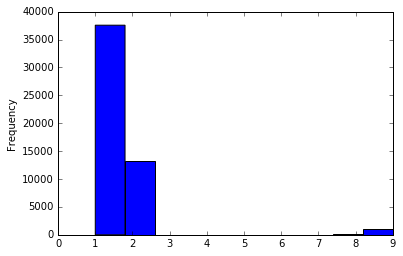

In [94]:
df['sex'].plot(kind='hist')

In [95]:
df['age'].unique()
# There are a few Dots present in the data
df['age'].value_counts().to_dict()

{5: 1,
 7: 2,
 8: 1,
 9: 1,
 10: 3,
 11: 7,
 12: 7,
 13: 15,
 14: 29,
 15: 82,
 16: 363,
 17: 565,
 18: 798,
 19: 847,
 20: 922,
 21: 1006,
 22: 1047,
 23: 1014,
 24: 977,
 25: 996,
 26: 943,
 27: 978,
 28: 875,
 29: 834,
 30: 796,
 31: 796,
 32: 786,
 33: 773,
 34: 692,
 35: 695,
 36: 688,
 37: 665,
 38: 633,
 39: 638,
 40: 615,
 41: 607,
 42: 648,
 43: 617,
 44: 645,
 45: 641,
 46: 637,
 47: 597,
 48: 581,
 49: 596,
 50: 620,
 51: 638,
 52: 731,
 53: 651,
 54: 608,
 55: 659,
 56: 645,
 57: 589,
 58: 608,
 59: 577,
 60: 550,
 61: 527,
 62: 509,
 63: 458,
 64: 451,
 65: 448,
 66: 408,
 67: 384,
 68: 380,
 69: 394,
 70: 289,
 71: 257,
 72: 296,
 73: 260,
 74: 246,
 75: 208,
 76: 193,
 77: 205,
 78: 179,
 79: 177,
 80: 179,
 81: 160,
 82: 140,
 83: 135,
 84: 144,
 85: 115,
 86: 117,
 87: 96,
 88: 81,
 89: 94,
 90: 61,
 91: 56,
 92: 33,
 93: 25,
 94: 14,
 95: 6,
 96: 14,
 97: 6,
 98: 1,
 99: 2,
 100: 1,
 101: 1,
 998: 100,
 999: 733,
 '12': 2,
 '13': 3,
 '14': 5,
 '15': 20,
 '16': 52,
 '1

In [96]:
df.age[df.age == '.'] = '-1' 


In [97]:
df.age = df.age.astype(np.int64)

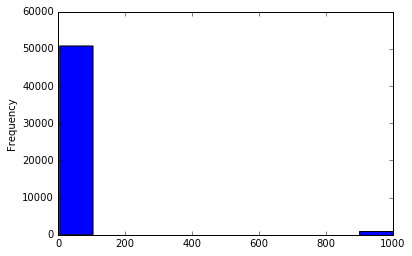

In [98]:
df['age'].plot(kind='hist')

In [99]:
df.columns


Index([u'state_definitions', u'casenum', u'vehicle_number', u'hyperlink',
       u'atmospheric_condition_1', u'atmospheric_condition_2',
       u'crash_related_factor_1', u'crash_related_factor_2',
       u'crash_related_factor_3', u'dayofweek', u'driverdrowsy',
       u'First_Harmful_Event', u'funcsystem', u'holiday', u'numfatal', u'age',
       u'alcres', u'alcsts', u'drugres1', u'drugres2', u'drugres3', u'drugsts',
       u'person_related_factor_1', u'person_related_factor_2',
       u'person_related_factor_3', u'person_type',
       u'police_Related_drug_involvement', u'alcinvol', u'seatpos', u'sex',
       u'most_harmful_event', u'number_of_fatalities_in_vehicle', u'numoccs',
       u'commlic', u'licrestrict', u'malcohol', u'drivpres',
       u'driver_Related_Factor_1', u'driver_Related_Factor_2',
       u'driver_Related_Factor_3', u'driver_Related_Factor_4', u'noncdl',
       u'noncdltype', u'prevacc', u'crashtype', u'criticaleventcat',
       u'criticalevent', u'dridistract', u'

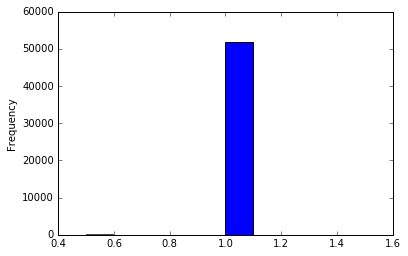

In [100]:
df['person_type'].plot(kind='hist')

In [101]:
df.age[df["age"]<21] = 0
df.age[(df["age"]>=21) & (df["age"]<=50)] = 1
df.age[df["age"]>50] = 2

/Users/danielsampetethiyagu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/danielsampetethiyagu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/danielsampetethiyagu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_i

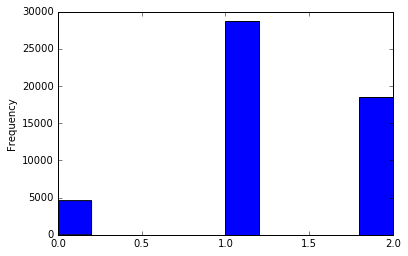

In [103]:
df['age'].plot(kind='hist')

In [104]:
gender_male = df[df['sex']==1]
gender_female = df[df['sex']==2]
under_21 = df[df["age"]==0]
after_21_to_50 = df[df["age"]==1]
after_50 = df[df["age"]==2]

In [110]:
gender_male_gn_crash = float(len(gender_male)) / len(df)
gender_female_gn_crash = float(len(gender_female)) / len(df)
under_21_gn_crash = float(len(under_21)) / len(df)
after_21_to_50_gn_crash = float(len(after_21_to_50)) / len(df)
after_50_gn_crash = float(len(after_50)) / len(df)

In [111]:
gender_male_under_21_gn_crash = float(len(gender_male[gender_male["age"]==0]))/ len(gender_male)
gender_male_after_21_to_50_gn_crash = float(len(gender_male[gender_male["age"]==1])) / len(gender_male)
gender_male_after_50_gn_crash = float(len(gender_male[gender_male["age"]==2])) / len(gender_male)

gender_female_under_21_gn_crash = float(len(gender_female[gender_female["age"]==0])) / len(gender_female)
gender_female_after_21_to_50_gn_crash = float(len(gender_female[gender_female["age"]==1])) / len(gender_female)
gender_female_after_50_gn_crash = float(len(gender_female[gender_female["age"]==2])) / len(gender_female)


In [114]:
print gender_male_under_21_gn_crash, gender_male_gn_crash*under_21_gn_crash
print gender_male_after_21_to_50_gn_crash, gender_male_gn_crash*after_21_to_50_gn_crash
print gender_male_after_50_gn_crash, gender_male_gn_crash*after_50_gn_crash
print gender_female_under_21_gn_crash, gender_female_gn_crash*under_21_gn_crash
print gender_female_after_21_to_50_gn_crash, gender_female_gn_crash*after_21_to_50_gn_crash
print gender_female_after_50_gn_crash, gender_female_gn_crash*after_50_gn_crash

0.0848152486423 0.0639897095764
0.570226812906 0.401360853183
0.344957938452 0.258230744788
0.105580239476 0.0226205769744
0.554559831313 0.141882407875
0.339859929212 0.0912854344596
